# Laboratorio 3
## Procesamiento Digital de Señales
## 2023-2

Santiago Naranjo Sanchez

cc:1017267682

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import delay_noise

#2. Análisis de pulsos de radar

1. Genere un pulso rectangular de 35 muestras. Tip: Utilice la funci ́on de numpy np.ones(35).

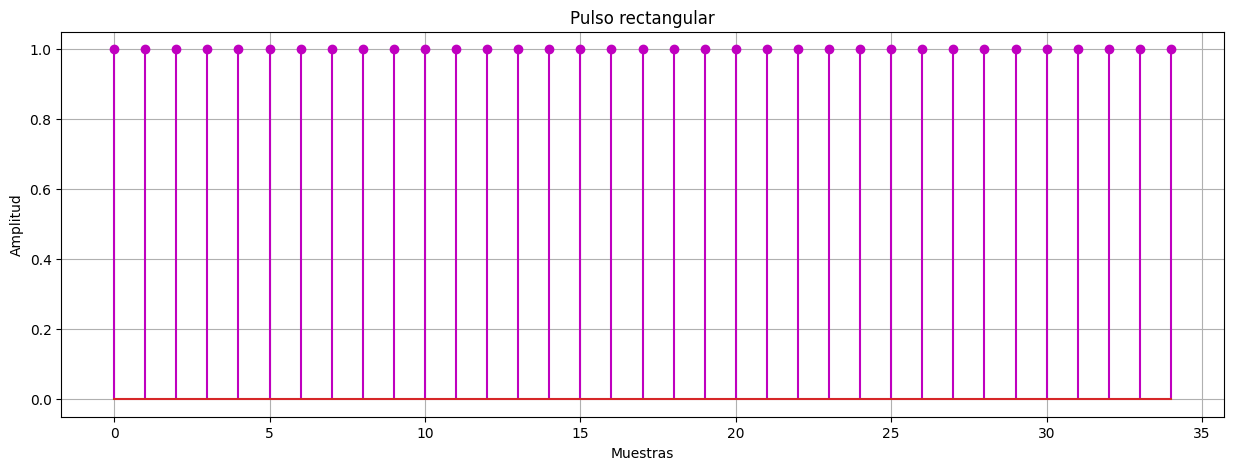

In [37]:
rect_pulse = np.ones(35) #Pulso rectangular
t= np.arange(len(rect_pulse)) #Vector de tiempo

#Gráfica
plt.figure(figsize=(15,5))
plt.stem(t,rect_pulse,"m-o") #para separar los pulsos individualmente
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.title("Pulso rectangular")
plt.grid()
plt.show()

2.Calcule y grafique la funci ́on de autocorrelaci ́on del pulso generado.

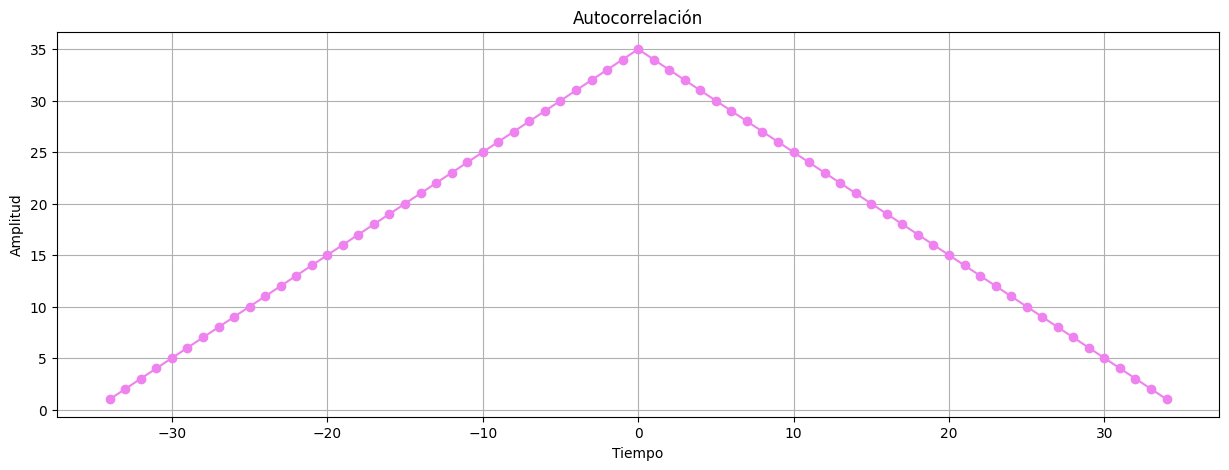

In [38]:
Rxx=np.correlate(rect_pulse, rect_pulse, mode='full')
tau=np.arange(-len(rect_pulse)+1,len(rect_pulse),1) # vector de retraso

#Gráfica
plt.figure(figsize=(15,5))
plt.plot(tau,Rxx,"o-",color = 'violet',)
plt.title("Autocorrelación")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

¿Qué puede concluir de la gráfica obtenida?

El valor máximo de Rxx, se encuentra en el origen y este valor corresponde a la energía de la señal, al realizar la autocorrelacion de un pulso rectangular la señal va aumentando en linea recta hasta que los dos pulsos alcancen la misma posicion que seria 0s.

3. Utilice la función delay noise incluida en la librería adjunta 'utils.py' para simular el ruido introducido
por el canal, y el desfase de la señal recibida respecto a la original. Grafique el resultado, ¿Es capaz de
distinguir el pulso y decir cuanto es su retraso?

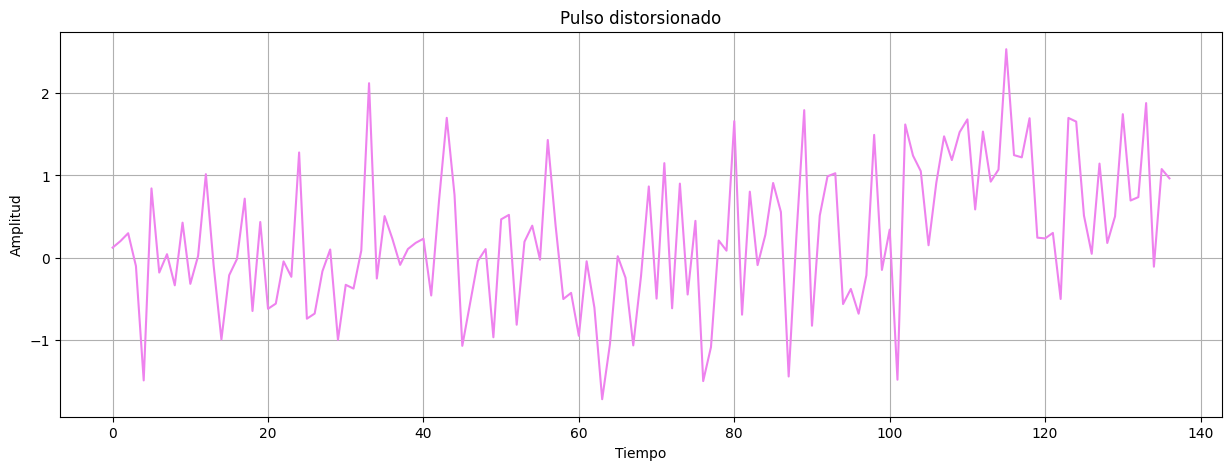

In [39]:
delayed_pulse = delay_noise(rect_pulse) #Se aplica la función dada para afectar la señal.
t = np.arange(len(delayed_pulse)) #Vector de tiempo para la señal distorsionada.

#Gráfica
plt.figure(figsize=(15,5))
plt.plot(t,delayed_pulse,color = 'violet')
plt.title("Pulso distorsionado")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

¿Es capaz de
distinguir el pulso y decir cuanto es su retraso?
No es posible distinguir el pulso y menos su retraso,el ruido afecta mucho a la señal


4. Utilice la función de numpy np.correlate para hallar la correlación entre la se ̃nal distorsionada y la señal
original. Muestre el resultado gráficamente ¿Cúal es el retraso? ¿Qué se puede concluir?

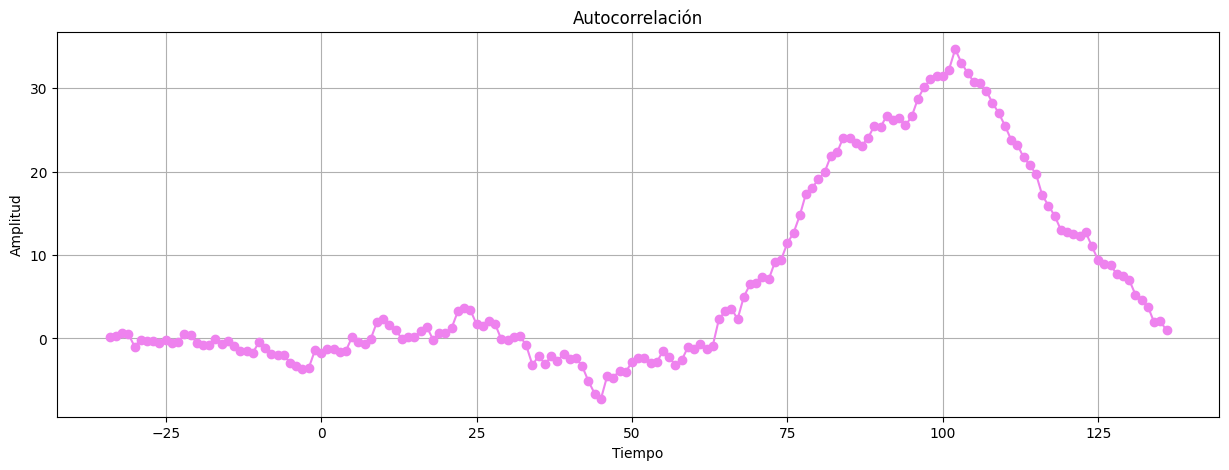

la señal se retrasa las siguientes muestras: 102


In [40]:
xcorr=np.correlate(delayed_pulse,rect_pulse,"full")
#tau=np.arange(len(xcorr)) # vector de retraso
tau=np.arange(-len(rect_pulse)+1,len(delayed_pulse),1) # vector de retraso

#Gráfica
plt.figure(figsize=(15,5))
plt.plot(tau,xcorr,"o-",color = 'violet',)
plt.title("Autocorrelación")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()
plt.show()
delay=tau[np.argmax(xcorr)]
print("la señal se retrasa las siguientes muestras: {}".format(delay))

**¿Cuál es el retraso? ¿Qué se puede concluir?.**

El retraso es el numero de muestras
El valor máximo se encuentra en este retraso y el de la autocorrelacion original estaba en 0 lo que confirma el valor del retraso, tambien se observa una forma triangular como la vista en la autocorrelacion pero con distorcion y ruido como es perado al realizar autocorrelacion cruzada.

# 3. Análisis de Señales de Marcha
Desarrolle un código que cargue la señal adjunta, y seleccione el canal correspondiente al  ́ultimo dígito de su
cédula, y finalmente la grafique

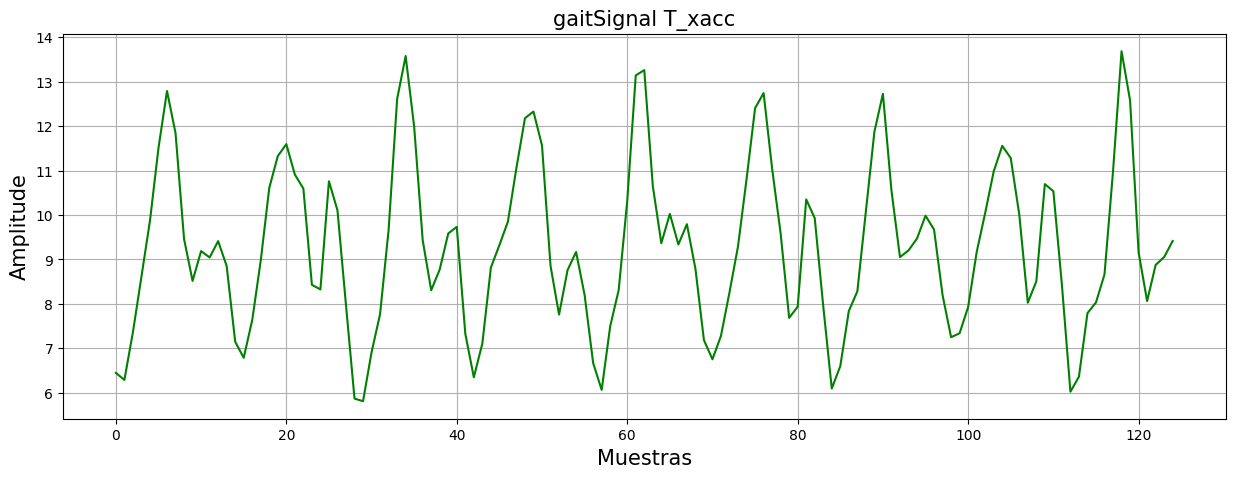

In [44]:

import pandas as pd
csvfile='gaitSignal.txt' # Debe estar en la misma carpeta del .ipybn
f = pd.read_csv(csvfile)
ft=f['T_xacc']
plt.figure(figsize=(15,5))
plt.plot(ft,color = 'green')
plt.title('gaitSignal T_xacc',fontsize=15)
plt.xlabel('Muestras',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.grid()
plt.show()

1. Normalice la señal restándole la media y luego dividiendo por su máximo valor absoluto (Recuerde del
laboratorio 2). Luego, grafique la señal asignada en función del tiempo y presente un breve analisis
sobre la misma.

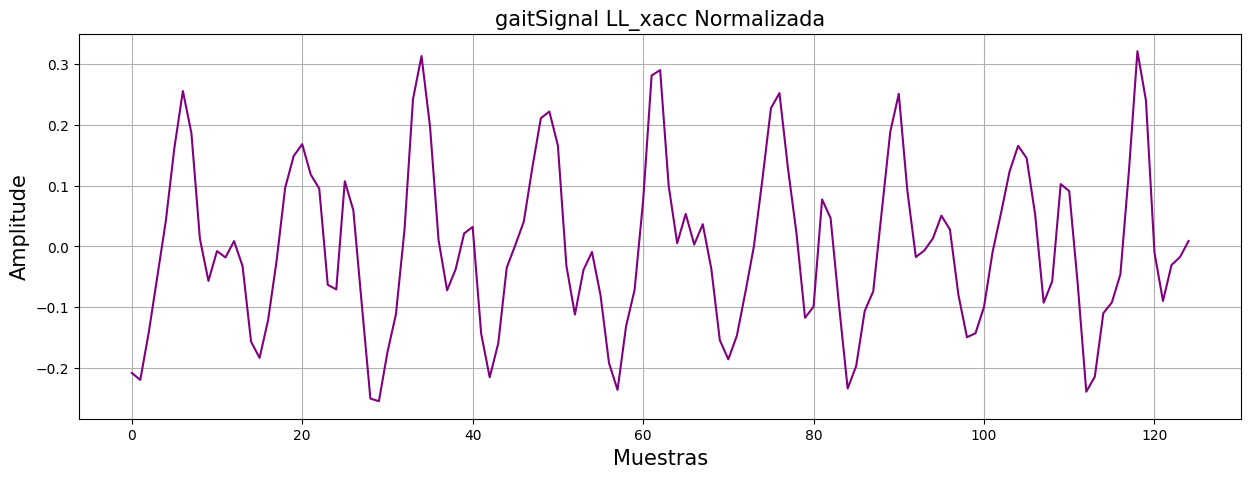

In [47]:
# x es la señal que se desea normalizar
ft_nor = (ft - np.mean(ft)) / float(max(abs(ft)))

tau3=np.arange(-len(ft_nor)+1,len(ft_nor),1)

plt.figure(figsize=(15,5))

plt.plot(ft_nor,color ="purple")
plt.title('gaitSignal LL_xacc Normalizada',fontsize=15)
plt.xlabel('Muestras',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.grid()
plt.show()

Se obtiene la señal normalizada en amplitud y conserva su intervalo de muestras.

2. ¿Cuál es el periodo de muestreo de la señal?

In [28]:
#2 Periodo de la muestra.
periodo = 1/25
print("como la frecuencia de muestreo es de 25Hz, El periodo de muestreo de la señal es de: {}".format(periodo))

La frecuencia de muestreo es de 25Hz, El periodo de muestreo de la señal es de: 0.04


3. Calcule la autocorrelación de la señal obtenida y grafiquela. ¿Qué se puede concluir?

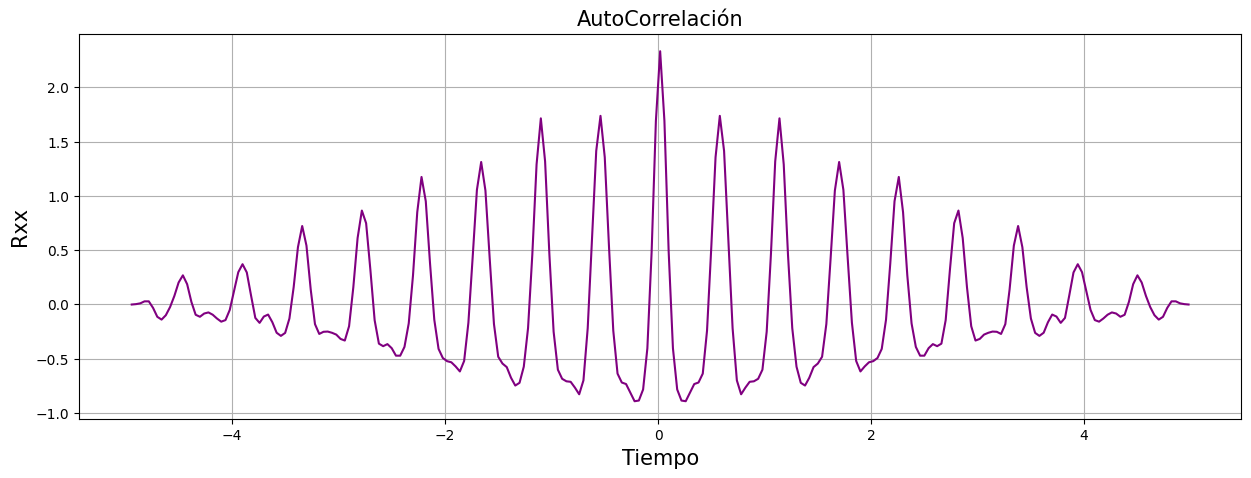

In [48]:
autocorr = np.correlate(ft_nor, ft_nor, mode='full')
tau4=np.arange(((-(len(autocorr)/2)+1)/25),(len(autocorr)/2)/25,1/25)
plt.figure(figsize=(15,5))

plt.plot(tau4,autocorr,color ="purple")
plt.title('AutoCorrelación',fontsize=15)
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Rxx',fontsize=15)
#pico_max = np.argmax(autocorr)
plt.grid()
plt.show()

¿Qué se puede concluir? La componente de mayor tamaño nos suministra la energia de la señal y también el tiempo en el que se alcanza la maxima similitud entre la señal original y la versión desplazada para correlacionar.

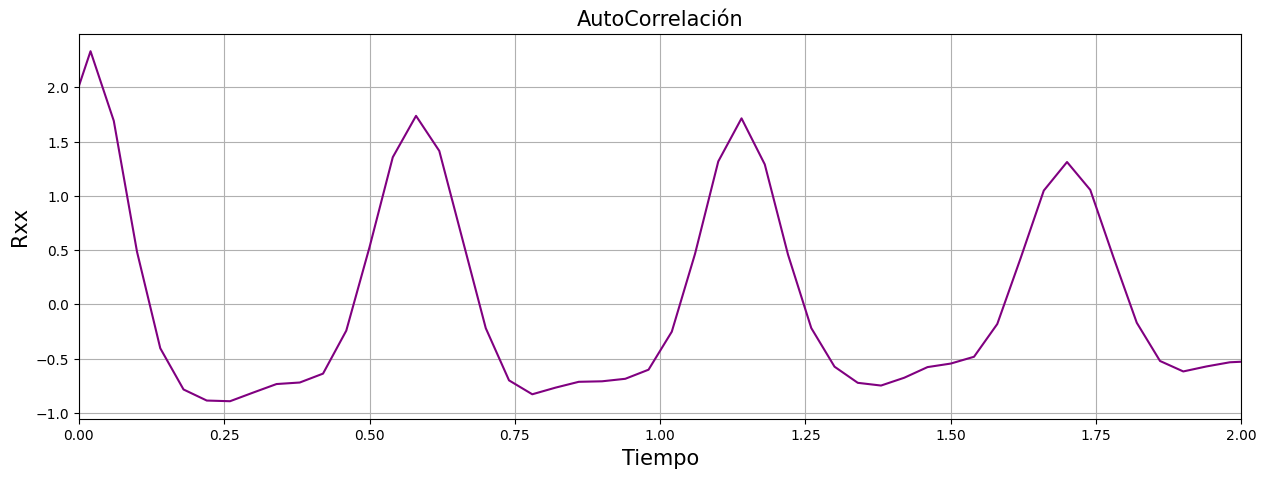

In [50]:
autocorr = np.correlate(ft_nor, ft_nor, mode='full')
tau4=np.arange(((-(len(autocorr)/2)+1)/25),(len(autocorr)/2)/25,1/25)
plt.figure(figsize=(15,5))

plt.plot(tau4,autocorr,color ="purple")
plt.title('AutoCorrelación',fontsize=15)
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Rxx',fontsize=15)
plt.xlim(0, 2)
plt.grid()
plt.show()

#3.2.  Medición del periodo de la señal
El periodo de la señal corresponde al tiempo entre 0 y la posición del primer pico de la función de auto-
correlación. Ya que es donde se encuentra la m ́axima similitud de las se ̃nales cuando van ocurriendo los

desplazamientos

1. Determine e indique el periodo de la señal a partir del tiempo para el primer máximo global de la
autocorrelación después de cero.

130
1.7374890758629313
(array([110, 138]),)


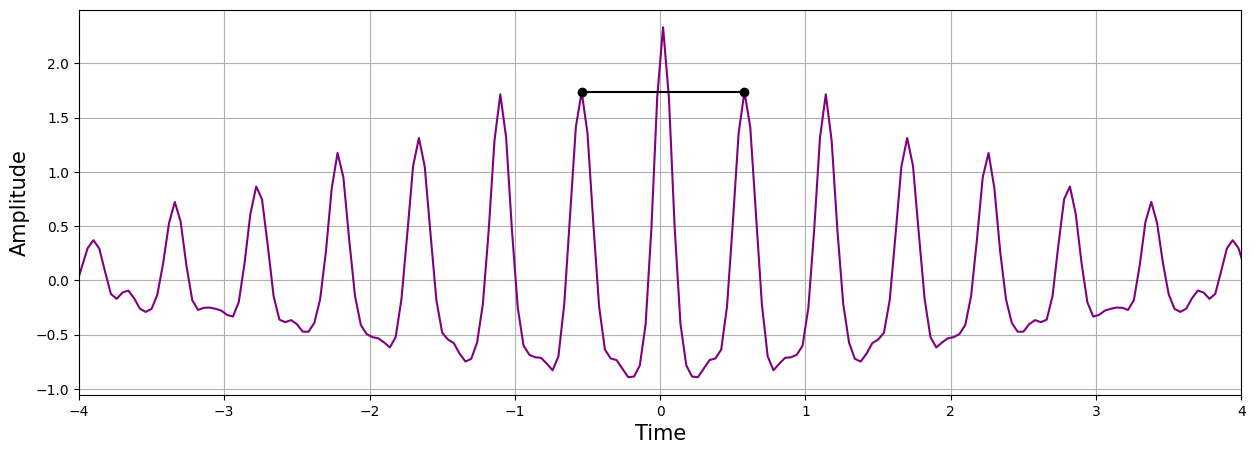

El período de la señal es: [-0.54  0.58]


In [60]:
plt.figure(figsize=(15,5))
plt.plot(tau4,autocorr,color ="purple")
plt.xlabel('Time',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.grid()
plt.xlim([-4,4])

first_peak = np.argmin(autocorr[len(autocorr)//2:]) + len(autocorr)//2
# Calcular el período de la señal
print(first_peak)
# Graficar la autocorrelación y el primer máximo global
d=max(autocorr[first_peak:len(autocorr)])
print(d)
index = np.where(autocorr == d)
print(index)
plt.plot(tau4[index], autocorr[index], 'k-o')
plt.show()
# Imprimir el período de la señal
print("El período de la señal es:", tau4[index])



#Conclusiones

* Realizando la correlación entre señales es posible hallar retardos en ellas, al igual que la distancia entre un objeto y otro.

* Se utiliza correlación cruzada cuando la señal viene con ruido y desfazada, ya que no se tiene la misma señal enviada.

* Los coeficientes de correlación pueden tomar valores entre -1 y 1, este valor determina si son iguales, inversas o diferentes.

* Normalizar una señal permite trabajar de una mejor manera con esta ya que se tiene un rango menor y permite ver más detalles.

* En la autocorrelación cada cierto intervalo o desplazamiento la señal se parece con ella misma lo que permite hallar la cuasi-periodicidad.